In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


### IMDb Movie Review Sentiment Analysis
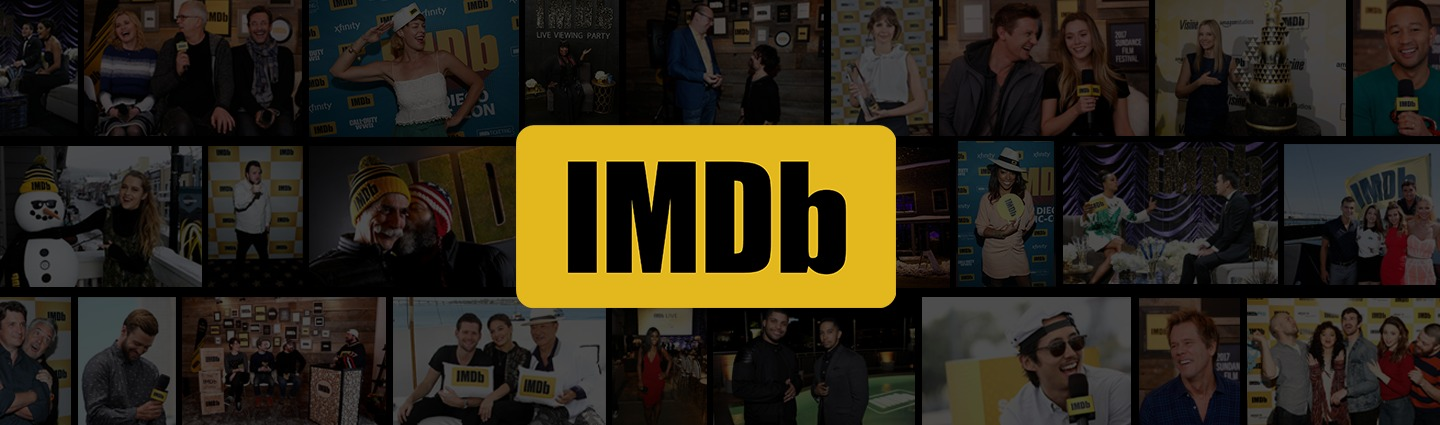
**1. Overview**  
Sentiment analysis is a natural language processing (NLP) task that involves determining
whether a given text expresses a positive or negative sentiment. In this project, we will
analyze movie reviews from the IMDb dataset and predict the sentiment (positive or
negative) based on the text of the reviews. By leveraging various text preprocessing
techniques, feature extraction methods, and classification algorithms, this project will
develop a machine learning model capable of accurately predicting the sentiment of movie
reviews. The insights derived from this analysis can be useful for movie producers, critics,
and platforms like IMDb to understand public opinion and tailor marketing or content
strategies accordingly.

**2. Problem Statement**  
The primary objective of this project is to build a machine learning classification model that
can predict the sentiment of IMDb movie reviews. The dataset contains a collection of movie
reviews, and each review is labeled as either positive or negative.
Using text preprocessing, feature extraction techniques (such as TF-IDF), and various
classification algorithms, the project will aim to develop a model that can effectively classify
the sentiment of movie reviews. The model's performance will be evaluated using standard
classification metrics, such as accuracy, precision, recall, and F1-score.

**3. Dataset Information**  
The IMDb dataset contains a large number of movie reviews, each labeled with either a
positive or negative sentiment.
- **Text of the review:** The actual review provided by the user.
- **Sentiment label:** The sentiment of the review, either "positive" or "negative."

**Dataset: [Imdb](https://docs.google.com/spreadsheets/d/106x15uz8ccQ6Wvpc8-sYjXisBN8vewS435I7z3wd4sw/edit?gid=1889101679#gid=1889101679)**

**4. Deliverables**  
**1. Data Exploration and Preprocessing**  

- Analyze the dataset for trends, missing values, and outliers.
- Perform basic data exploration, such as checking for missing values, identifying imbalanced classes (positive/negative), and analyzing the length of reviews.

**Perform data cleaning and text preprocessing.**

- Steps will include:
  - Removing stop words, punctuation, and special characters.
  - Tokenization of text (splitting text into words).
  - Lemmatization and stemming.
  - Vectorization using techniques like Bag-of-Words and TF-IDF.

**2. Feature Engineering**   
- **Feature extraction using techniques like TF-IDF, Word2Vec, or embeddings**   
  - Transform the textual data into numerical features that can be used by machine learning models.
  - **Textual features:** Word count, character count, average word length, etc.

**3. Model Development**
- **Build and train classification models to predict the sentiment of reviews.**
  - Experiment with various classification algorithms such as Logistic Regression,
Naive Bayes, Support Vector Machine (SVM), Random Forest, and Neural
Networks (e.g., LSTM).

**4. Model Evaluation**
- Evaluate the model’s performance using appropriate metrics.

In [3]:
# Import Liabrary
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Basic NLP Preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Libraries for Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from gensim.models import Word2Vec

# Libraries for Deep Learning
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,GlobalMaxPooling1D,Conv1D, Embedding, LSTM, Activation, Dense, Dropout

# Libraries for Traditional Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import  GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

2025-09-30 08:28:03.413466: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759220883.668946      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759220883.761338      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
# uploading dataset
df = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
# null values
df.isnull().sum()

review       0
sentiment    0
dtype: int64

- no null values

In [7]:
df.duplicated().sum()

418

- > 418 duplicate values. 

In [8]:
df[df.duplicated()].head()

,review,sentiment
3537,Quite what the producers of this appalling ada...,negative
3769,My favourite police series of all time turns t...,positive
4391,"Beautiful film, pure Cassavetes style. Gena Ro...",positive
6352,If you liked the Grinch movie... go watch that...,negative
6479,I want very much to believe that the above quo...,negative


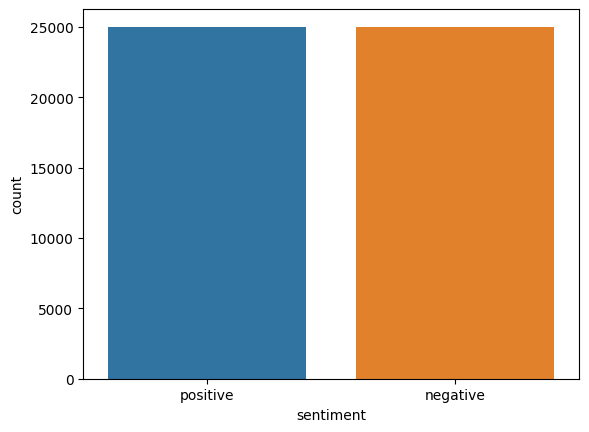

In [9]:
sns.countplot(x=df['sentiment'])
plt.show()

In [10]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [11]:
# Basic review statistics
df['review_length']=df['review'].apply(len)
df['review_word_count']=df['review'].apply(lambda x: len(x.split()))
df.describe()

,review_length,review_word_count
count,50000.000000,50000.000000
mean,1309.431020,231.156940
std,989.728014,171.343997
min,32.000000,4.000000
25%,699.000000,126.000000
50%,970.000000,173.000000
75%,1590.250000,280.000000
max,13704.000000,2470.000000


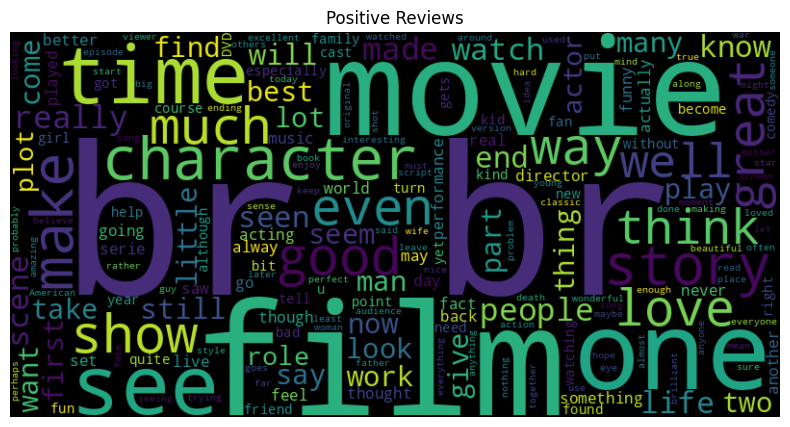

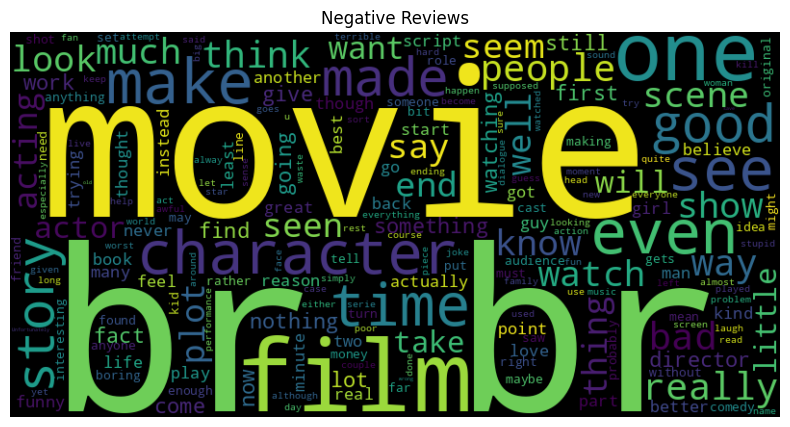

In [12]:
# Word cloud of review
from wordcloud import WordCloud

sentiment_type = ['positive','negative']

for col in sentiment_type:
    review_text = ' '.join(df[df['sentiment']== col]['review'])
    wc = WordCloud(width=800, height=400,background_color='black').generate(review_text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc,interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{col.capitalize()} Reviews')

In [13]:
df['review'][2]

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

#### Review cleaning and Tokenization

In [14]:
stop_words = set(stopwords.words('english'))

def clean_and_token(text):
    text = text.lower()    # Convert to lowercase
    text = re.sub(r'<.*?>',' ',text)  # Remove HTML tags
    text = re.sub(r'[^a-z\s]','',text)  # Remove special characters & numbers
    tokens = word_tokenize(text)  # Tokenize into words
    tokens = [word for word in tokens if word not in stop_words and len(word)>2] # Remove stopwords & short words
    tokens = [word for word in tokens if not re.search(r'(.)\1{2,}',word)]  # Remove words with 3+ repeated letters
    return tokens

#### Lemmatization, Stemming after Tokenization
For traditional machine learning

In [15]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def lemma_and_stem(tokens):
    lemma_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    stem_tokens = [stemmer.stem(word) for word in tokens]
    return {"lemma":lemma_tokens,"stem":stem_tokens}

In [16]:
# apply
df['tokens'] = df['review'].apply(clean_and_token)
df['lemma_stem'] = df['tokens'].apply(lemma_and_stem)

# Create separate columns for lemma & stem
df['lemmatize_review'] = df['lemma_stem'].apply(lambda x: x["lemma"])
df['stem_review'] = df['lemma_stem'].apply(lambda x: x['stem'])

In [17]:
print("Original Review:\n", df['review'][1])
print("Tokens:\n", df['tokens'][1])
print("Lemmatize Review:\n", df['lemmatize_review'][1])
print("Stem Review:\n",df['stem_review'][1])

Original Review:
 A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are ter

In [18]:
df['lemmatize_word'] = df['lemmatize_review'].apply(lambda x:' '.join(x))
df['lemmatize_word'][2]

'thought wonderful way spend time hot summer weekend sitting air conditioned theater watching lighthearted comedy plot simplistic dialogue witty character likable even well bread suspected serial killer may disappointed realize match point risk addiction thought proof woody allen still fully control style many grown love laughed one woodys comedy year dare say decade ive never impressed scarlet johanson managed tone sexy image jumped right average spirited young woman may crown jewel career wittier devil wear prada interesting superman great comedy see friend'

#### Bag of Words (BoW)

In [19]:
# create bow
bow = CountVectorizer()
x_bow = bow.fit_transform(df['lemmatize_word'])
print("BoW Shape:", x_bow.shape)
print(x_bow[:5].toarray())

BoW Shape: (50000, 149550)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


- Bag of Words (BoW) is a way of turning text into numbers by counting how many times each word appears, without caring about the order of the words.

#### TF-IDF

In [20]:
tf_idf = TfidfVectorizer()
x_tfidf = tf_idf.fit_transform(df['lemmatize_word'])
print("TF-IDF Shape:",x_tfidf.shape)
print(x_tfidf[:5].toarray())

TF-IDF Shape: (50000, 149550)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [21]:
print("Features Names Words:")
print(tf_idf.get_feature_names_out())

Features Names Words:
['aab' 'aachen' 'aada' ... 'zylbersteinand' 'zyuranger' 'zzvorkov']


- TF-IDF (Term Frequency–Inverse Document Frequency) is a method to show how important a word is in a document compared to all other documents in a collection. It gives higher weight to words that appear often in one document but not in many others.

#### Word2Vec

In [22]:
sente = df['lemmatize_review']
# Train Word2Vec model
w2v_model = Word2Vec(sente, vector_size=100, window=5, min_count=2)
# Check vector for a word
print(w2v_model.wv['good'])
# Find similar words
print(w2v_model.wv.most_similar('good'))

[ 0.3552391  -0.7993517  -0.69024384  0.45627055 -2.3514957   1.9635975
  1.7880708  -0.53943944 -1.0979809  -1.3156071  -0.14958912 -0.0197612
  0.04613907  0.21210814 -0.41192493  0.84084564 -1.6097662  -1.7450438
  0.47786903  0.39135906 -0.59528893 -0.2529552  -0.12848756  0.84369576
 -0.33416757 -1.0260032  -0.8955289   0.5024381   2.6670055   1.6229178
  1.9953696  -0.6688981  -0.61005574  1.4997599   0.5612181   2.5351567
 -0.6778345   1.5387135   1.7284554   1.5378814  -0.3464613   1.8086809
 -0.9361172   2.1689403   0.7903496   0.06393023  0.34220007  0.5214721
  0.12446506 -1.5070841  -0.98498785 -0.8596673  -1.5671502   1.8565036
  0.32712016  0.04260022 -0.03251347 -0.611024    0.3331636  -1.0010549
  0.8525706  -0.11611062  0.8571322  -1.1157213   0.663406    0.47134992
  0.9616321   2.103736   -3.1822712  -1.2381072  -0.3907912  -0.41776603
  1.4438952   1.7691019  -1.1493965  -0.28125793 -1.1834601  -0.03394131
 -0.80172783  1.4428443   2.8089592  -0.06840952  0.92580944

- Word2Vec ➡️ Needs tokenized words because it works at the word level, not the sentence level.
- lemmatize_review variable is tokenized.

In [23]:
# Function to get average Word2Vec vector for each document
def w2v_vector(tokens,model):
    vectors = [model.wv[w] for w in tokens if w in model.wv]
    if len(vectors) == 0:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

In [24]:
df['w2v_vector'] = df['lemmatize_review'].apply(lambda x:w2v_vector(x,w2v_model))

In [25]:
df['w2v_vector'][1]

array([-5.47606088e-02,  5.43955445e-01, -6.75250173e-01,  1.52506724e-01,
       -1.38819277e-01,  3.55402157e-02,  8.44347894e-01,  2.14584798e-01,
       -4.55517322e-01, -3.80783677e-02,  4.70256321e-02, -1.29001558e-01,
       -6.95250276e-03, -1.01798221e-01, -3.20972979e-01, -7.54628936e-03,
        2.04161659e-01, -3.21390927e-01, -4.14377391e-01, -2.18441904e-01,
        3.94882262e-01, -1.71239898e-01,  2.97550540e-02, -2.74770558e-01,
        2.11828589e-01, -3.08828741e-01, -1.29657716e-01, -1.54525831e-01,
        1.21518761e-01,  5.73193133e-01,  4.19085652e-01, -1.41237214e-01,
        8.39677006e-02,  2.88285106e-01, -1.46973848e-01,  6.17951930e-01,
        2.05391377e-01,  1.99406773e-01,  3.56015593e-01, -3.17307800e-01,
       -1.65710390e-01,  2.11724833e-01,  1.92152500e-01,  1.49948448e-01,
        1.74659744e-01, -3.33599359e-01, -1.03967488e-01, -1.18306562e-01,
        3.94438386e-01, -2.33136073e-01,  1.78351864e-01, -3.58144157e-02,
       -4.22876805e-01,  

**Word2Vec (Mostly for Traditional ML)**
- They capturing semantic meaning (e.g., "king" - "man" + "woman" ≈ "queen").


In [26]:
# Map sentiment variable to binary values
df['sentiment_binary'] = df['sentiment'].map({'positive':1,'negative':0})
y = df['sentiment_binary']
y[:5]

0    1
1    1
2    1
3    0
4    1
Name: sentiment_binary, dtype: int64

In [27]:
x = np.vstack(df['w2v_vector'].values)
# train test split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print("Training set Size:", x_train.shape)
print("Testing Set Size:", x_test.shape)

Training set Size: (40000, 100)
Testing Set Size: (10000, 100)


In [28]:
x,y

(array([[-1.95898041e-01,  6.22329533e-01, -2.56227165e-01, ...,
         -4.19185787e-01, -2.20498759e-02, -4.47342992e-01],
        [-5.47606088e-02,  5.43955445e-01, -6.75250173e-01, ...,
         -3.68798967e-04, -1.10146485e-01, -4.17220235e-01],
        [ 1.61264781e-02,  2.77779907e-01, -4.55049008e-01, ...,
         -2.94750780e-01,  4.24380451e-01, -4.52457160e-01],
        ...,
        [-1.23156063e-01, -9.94631425e-02,  3.53643745e-02, ...,
         -7.89600968e-01, -1.41058654e-01, -8.29300582e-01],
        [-6.61002621e-02,  3.55625957e-01, -9.42927822e-02, ...,
         -2.80988693e-01,  8.35919194e-03, -3.81298095e-01],
        [-1.96200445e-01,  5.08145750e-01, -5.23600757e-01, ...,
         -2.30558485e-01, -8.09689164e-02, -6.98561430e-01]], dtype=float32),
 0        1
 1        1
 2        1
 3        0
 4        1
         ..
 49995    1
 49996    0
 49997    0
 49998    0
 49999    0
 Name: sentiment_binary, Length: 50000, dtype: int64)

In [29]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier()
}

In [30]:
def evaluate_models(models,x_train,x_test,y_train,y_test):
    for name, model in models.items():
        model.fit(x_train,y_train)

        y_pred = model.predict(x_test)
        y_prob = model.predict_proba(x_test)[:,1]

        acc = accuracy_score(y_test,y_pred)
        roc_auc = roc_auc_score(y_test,y_prob)
        cr = classification_report(y_test,y_pred)

        print("="*50)
        print(f"model: {model.__class__.__name__}")
        print(f"Accuracy:{acc:.4f}")
        print(f"ROC-AUC: {roc_auc:.4f}")
        print(f"Classification Report:\n", cr)

In [31]:
evaluate_models(models, x_train, x_test, y_train, y_test)

model: LogisticRegression
Accuracy:0.8602
ROC-AUC: 0.9341
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86      4961
           1       0.86      0.87      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

model: GaussianNB
Accuracy:0.7687
ROC-AUC: 0.8464
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.76      0.77      4961
           1       0.77      0.77      0.77      5039

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000

model: SVC
Accuracy:0.8696
ROC-AUC: 0.9421
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      4961
           1  

- SVC model have best accuracy and AUC.

**ROC-AUC**  
- >Measures how well the model separates classes (0 vs 1).

**Deep Learning with LSTM**

In [32]:
X = df['lemmatize_word']
Y = df['sentiment_binary']

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#### Tokenization & padding

>Tokenizer: converts to integer sequences  
>pad_sequences: makes all sequences same length

In [33]:
# conver words to sequence
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# Pad sequences to make equal length
max_length=100
X_train = pad_sequences(X_train,maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

vocab_size = len(tokenizer.word_index) + 1
vocab_size

131118

In [34]:
print(list(tokenizer.word_index.items())[:15])

[('movie', 1), ('film', 2), ('one', 3), ('like', 4), ('time', 5), ('good', 6), ('character', 7), ('story', 8), ('even', 9), ('get', 10), ('would', 11), ('see', 12), ('make', 13), ('really', 14), ('scene', 15)]


In [35]:
print(X_train[0])

[ 1485 30070   112   115   107   928  1071  7500    67  8087   952     1
   835 13694   291 58528   151    10    35    35   477  2952  9882  1169
    91  3819 15760   111   566   246  4861 24078  2017 44457 13033   186
   509   242  2614  1053 14463  3203    61   336   860   949   723  1042
   155  2231   280   510   169  3195   832  9094  1199    10 13034   123
     3   103  1192   863  4307 18789 25680   124   250  4084  2175    99
  5137 33269   673    72    57    36  1412   357   129   205  1252  1384
  5071   452     2  3007  1578  2154   216   316  2276 15761 44458   405
  3275   121   128  3454]


> Model Building  
>   > LSTM:

In [45]:
m = Sequential()
m.add(Embedding(vocab_size,100,input_length=max_length))
m.add(LSTM(64, return_sequences=False))
m.add(Dropout(0.6))
m.add(Dense(1, activation='sigmoid'))

In [46]:
m.build(input_shape=(None,max_length))
m.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
m.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 100)       │    13,111,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        42,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,154,105 (50.18 MB)

 Trainable params: 13,154,105 (50.18 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

In [47]:
es = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)
history = m.fit(X_train,Y_train,epochs=5,batch_size=64,validation_data=[X_test,Y_test],callbacks=[es],verbose=1)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 109s 170ms/step - accuracy: 0.7797 - loss: 0.4520 - val_accuracy: 0.8824 - val_loss: 0.2803
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 105s 167ms/step - accuracy: 0.9441 - loss: 0.1593 - val_accuracy: 0.8727 - val_loss: 0.3125
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 105s 168ms/step - accuracy: 0.9733 - loss: 0.0795 - val_accuracy: 0.8714 - val_loss: 0.3856


In [48]:
result = m.evaluate(X_test,Y_test,verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8823 - loss: 0.2762


In [49]:
print("Test Accuracy:", result[1])
print("Test Loss:", result[0])

Test Accuracy: 0.8823999762535095
Test Loss: 0.280314564704895


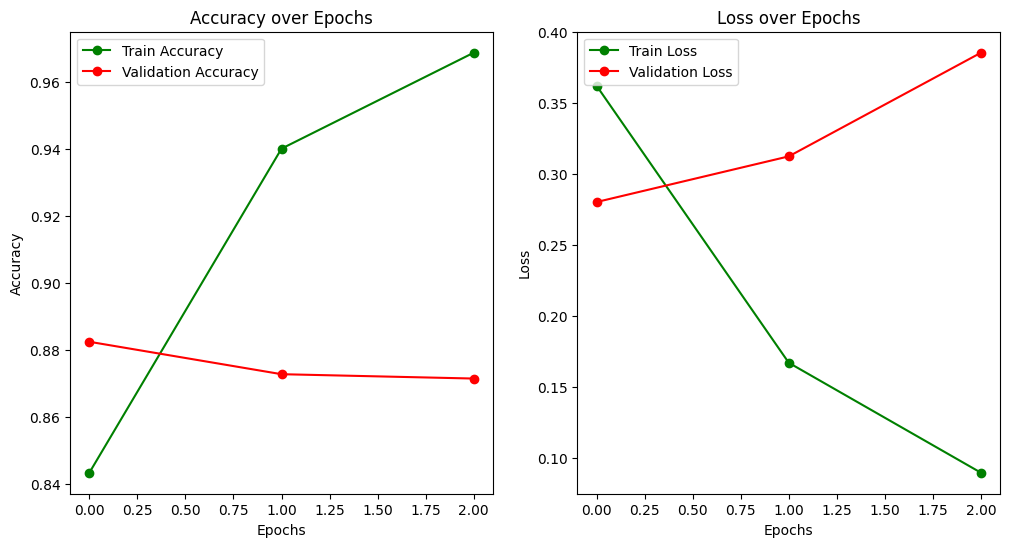

In [57]:
# Plot accuracy
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy',color='green',marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy',color='red',marker='o')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss',color='green',marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss',color='red',marker='o')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Performance:**

>**Test Accuracy: ~88%**  
>**Test Loss: ~0.28**